In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
from scipy.stats import gaussian_kde
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
city = 'Guadalajara'
res = 8

In [3]:
censo_folder = f'censo_block_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf.head(2)

(1160, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city
0,8849aa2d99fffff,848.0,427.0,421.0,46.0,16.0,24.0,794.0,403.0,391.0,...,0.716981,0.160377,-0.281484,0.0,None,0.716981,-2.276028,None,"POLYGON ((-103.32340 20.57940, -103.31887 20.5...",Guadalajara
1,88498c95cbfffff,7259.0,3697.0,3557.0,310.0,149.0,128.0,6899.0,3510.0,3389.0,...,0.839589,0.083110,0.391420,0.0,None,0.839589,-4.227884,None,"POLYGON ((-103.29386 20.71601, -103.28932 20.7...",Guadalajara


In [4]:
censo_folder = f'censo_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf_ageb = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf_ageb.head(2)

(1160, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city
0,8849aa2d99fffff,848.0,427.0,421.0,46.0,16.0,24.0,794.0,403.0,391.0,...,0.716981,0.160377,-0.281484,0.0,None,0.716981,-2.276028,None,"POLYGON ((-103.32340 20.57940, -103.31887 20.5...",Guadalajara
1,88498c95cbfffff,7259.0,3697.0,3557.0,310.0,149.0,128.0,6899.0,3510.0,3389.0,...,0.839589,0.083110,0.391420,0.0,None,0.839589,-4.227884,None,"POLYGON ((-103.29386 20.71601, -103.28932 20.7...",Guadalajara


<AxesSubplot:>

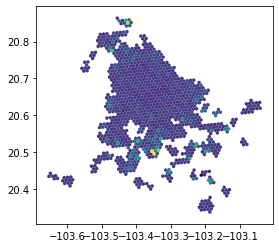

In [5]:
gdf.plot('T_Viv_10_20')

## EDA

In [6]:
gdf.T_Viv_10_20.sum()

414478.0

In [7]:
gdf.T_Pob_10_20.sum()

739333.0

In [8]:
gdf.vivpar_des.sum()

209745.0

In [9]:
gdf.prom_ocup.mean()

3.435862015245294

In [10]:
gdf.T_Pob_10_20.sum()/gdf.T_Viv_10_20.sum()

1.7837689817071112

In [11]:
gdf.T_Viv_10_20.mean()

357.3086206896552

In [12]:
gdf.T_Viv_10_20.median()

146.0

In [13]:
gdf.T_Viv_10_20.std()

692.5013292685062

In [14]:
gdf.T_Viv_10_20.min()

-1313.0

In [15]:
gdf.T_Viv_10_20.max()

7589.0

Text(0.5, 6.79999999999999, 'Cambio de vivienda')

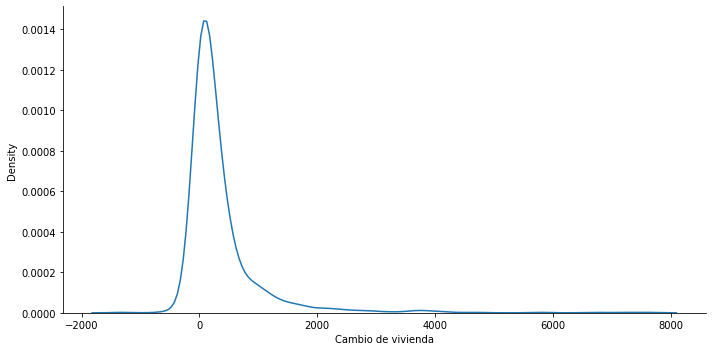

In [16]:
g = sns.displot(data=gdf, x="T_Viv_10_20", kind="kde",
           height=5, aspect=2)
plt.xlabel('Cambio de vivienda')

Text(0.5, 0, 'Cambio de vivienda')

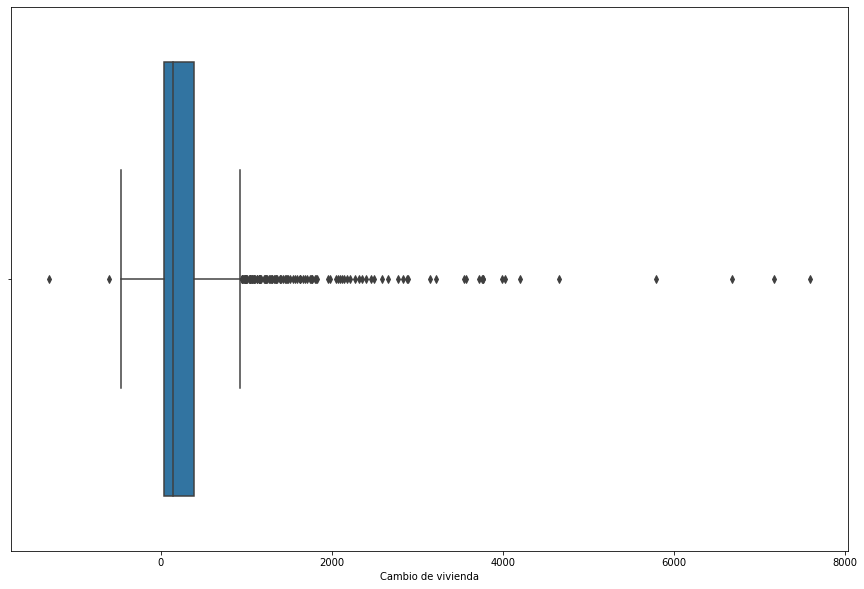

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

# x = np.array(gdf_sq['Metros cuadrados de construcción'])
y = np.array(gdf['T_Viv_10_20'])

sns.boxplot(x=y, ax=ax)

plt.xlabel('Cambio de vivienda')

## Change analysis

### New households

<AxesSubplot:>

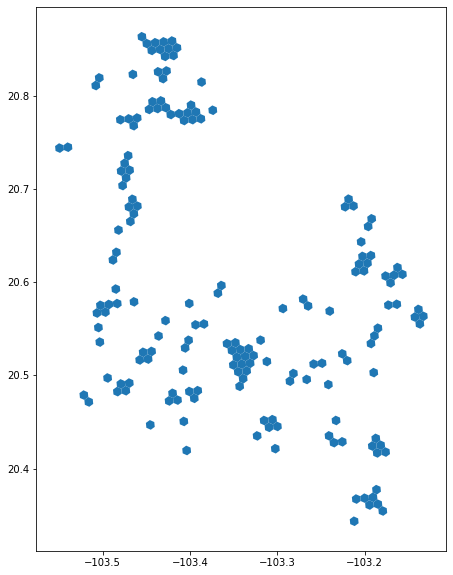

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf['10_vivtot']==0].plot(ax=ax) #### COMPARTIR

In [19]:
gdf[gdf['10_vivtot']==0]['vivtot'].sum()

131111.0

In [20]:
pct_new_house = gdf[gdf['10_vivtot']==0]['vivtot'].sum() / gdf.T_Viv_10_20.sum()
print(f'Porcentaje de viviendas nuevas en sitios donde no había nada {round(pct_new_house,4) * 100}')

Porcentaje de viviendas nuevas en sitios donde no había nada 31.630000000000003


In [21]:
gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()

83956.0

In [22]:
gdf[gdf['10_vivtot']==0]['pobtot'].sum()

287678.0

In [23]:
gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()

3.4265329458287677

In [24]:
pct_new_people = gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf.T_Pob_10_20.sum()
print(f'Porcentaje de poblacion nuevas en sitios donde no había nada {round(pct_new_people,4) * 100}')

Porcentaje de poblacion nuevas en sitios donde no había nada 38.91


In [25]:
gdf[gdf['10_vivtot']==0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']==0]['vivtot'].sum()

0.6403429155448437

### Existing households

In [26]:
avg_hab = gdf[gdf['10_vivtot']>0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']>0]['vivtot'].sum()
print(f'Promedio de viviendas ocupadas {round(avg_hab,4) * 100}')

Promedio de viviendas ocupadas 84.34


<AxesSubplot:>

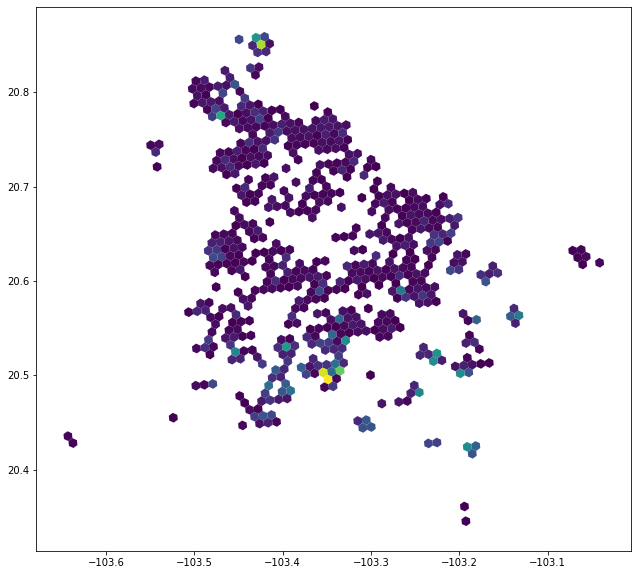

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median()].plot('T_Viv_10_20', ax=ax)

<AxesSubplot:>

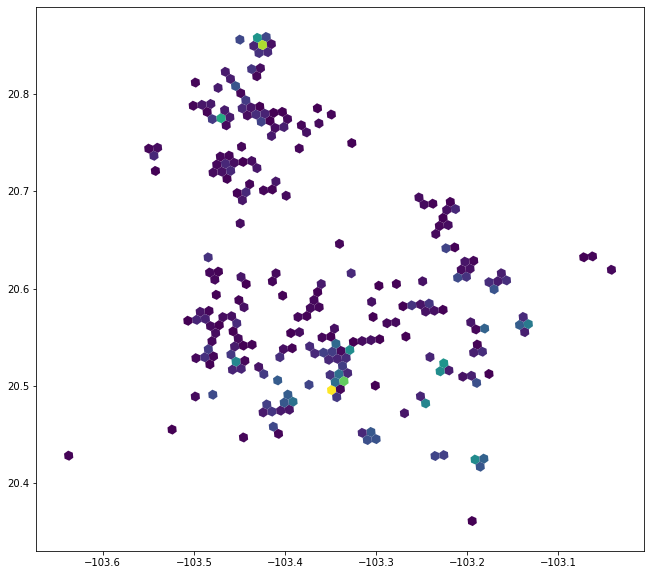

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())&
    (gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)

<AxesSubplot:>

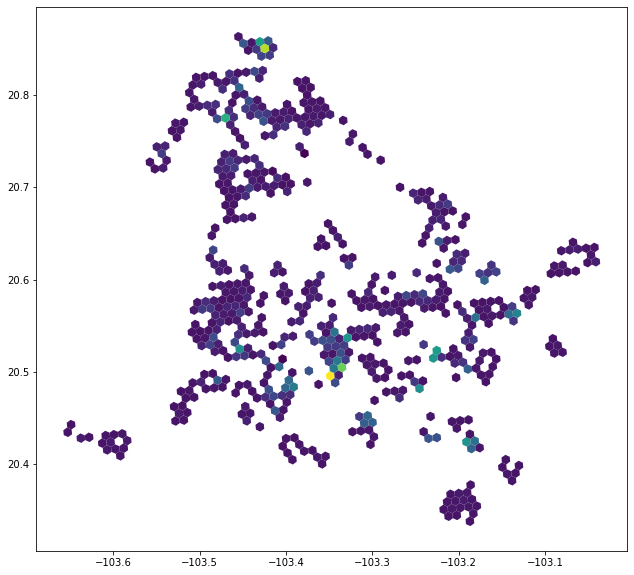

In [29]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())].plot('T_Viv_10_20', ax=ax)

<AxesSubplot:>

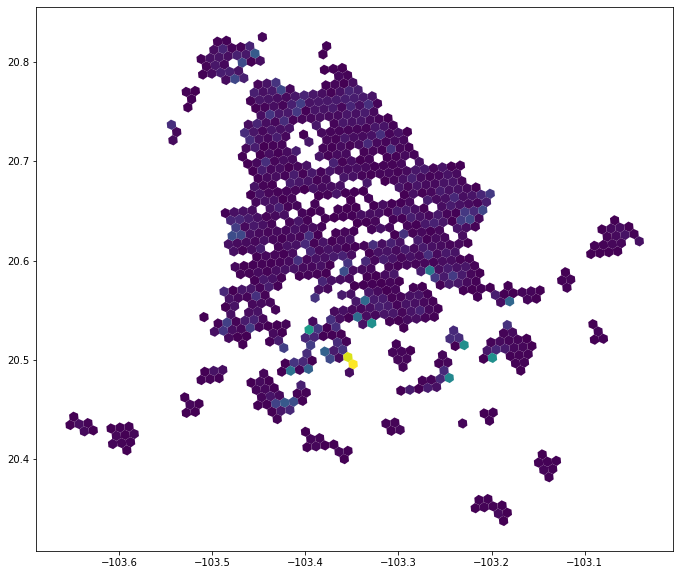

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>0)].plot('T_Viv_10_20', ax=ax)

<AxesSubplot:>

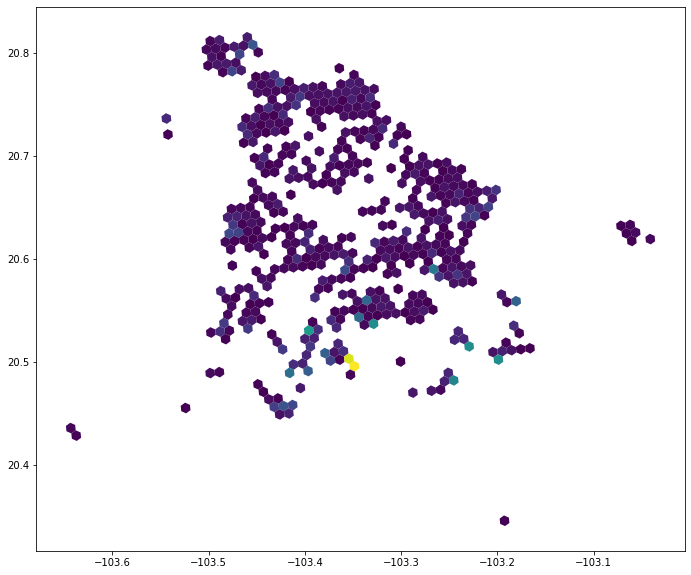

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)

<AxesSubplot:>

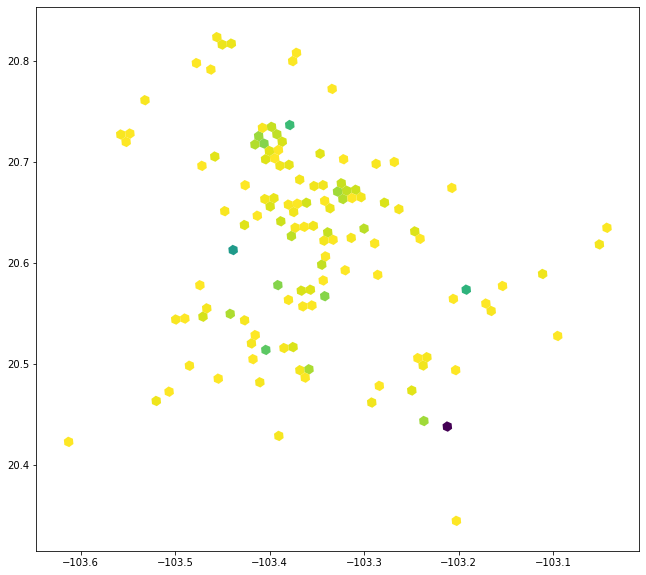

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf.T_Viv_10_20<0].plot('T_Viv_10_20', ax=ax)

In [33]:
gdf[gdf.T_Viv_10_20<0]['T_Pob_10_20'].sum()

-56597.0

In [34]:
gdf[gdf.T_Pob_10_20<0]['T_Pob_10_20'].sum()

-219805.0

<AxesSubplot:>

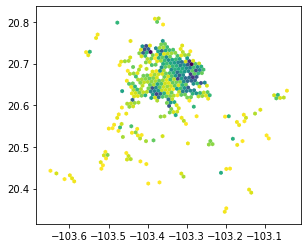

In [35]:
gdf[gdf.T_Pob_10_20<0].plot('T_Pob_10_20')

<AxesSubplot:>

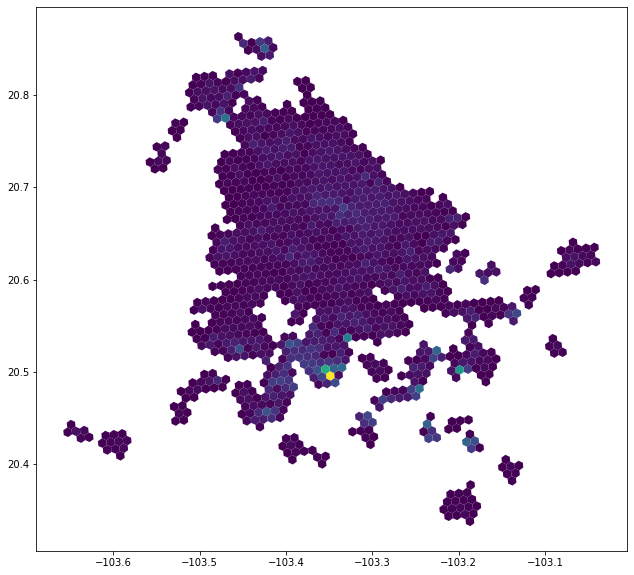

In [36]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.plot('vivpar_des', ax=ax)

## Household vs mass public transport

In [37]:
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/pop_change/'
hex_tp = gpd.read_file(grl_dir+f'{city}_HexRes{res}_MassPublicTransport.geojson', driver='GeoJSON')
print(hex_tp.shape)
hex_tp.head(2)

(4095, 4)


,hex_id_8,CVEGEO,time_transporte_masivo_V2,geometry
0,8849abc91bfffff,14002,0.000000,"POLYGON ((-103.60989 20.39686, -103.61044 20.4..."
1,8849abc953fffff,14002,617.958757,"POLYGON ((-103.61277 20.37822, -103.60824 20.3..."


In [38]:
if city == 'Guadalajara':
    hex_tp = hex_tp.rename(columns={'time_transporte_masivo_V2':'time_paradas_transporte'})

In [39]:
hex_tp = hex_tp[[f'hex_id_{res}','time_paradas_transporte']].copy()
gdf_filter = gdf[[f'hex_id_{res}','10_vivtot','T_Pob_10_20','vivpar_des',
                  'pobtot','10_prom_ocup','prom_ocup','10_pobtot','tvivparhab',
                   'vivtot','T_Viv_10_20','R_VivDes_20','geometry']].copy()

In [40]:
gdf_filter['pct_vivpardes'] = gdf_filter['vivpar_des'] / gdf_filter['vivtot']

<AxesSubplot:>

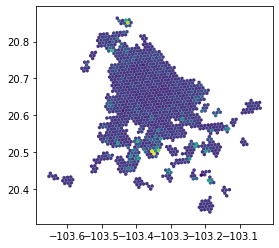

In [41]:
hex_merge = gdf_filter.merge(hex_tp, on='hex_id_8')
hex_merge.plot('T_Viv_10_20')

In [42]:
time_analysis = [0, 10, 20, 30, 60, 120, 180, 270, 10000]
hex_merge['time_group'] = np.nan

for i in range(1,len(time_analysis)):
    min_time = time_analysis[i-1]
    max_time = time_analysis[i]
    hex_merge.loc[(hex_merge.time_paradas_transporte>min_time)&
                 (hex_merge.time_paradas_transporte<=max_time), 'time_group'] = f'{time_analysis[i]}_min'

In [43]:
hex_agg = hex_merge[['time_group','T_Viv_10_20','T_Pob_10_20',
                     'vivpar_des','pct_vivpardes','10_prom_ocup','prom_ocup']].groupby('time_group').agg(['mean','median','std','sum'])
hex_agg.columns = hex_agg.columns.map('_'.join).str.strip('_')
hex_agg.sort_values('T_Viv_10_20_median')

,T_Viv_10_20_mean,T_Viv_10_20_median,T_Viv_10_20_std,T_Viv_10_20_sum,T_Pob_10_20_mean,T_Pob_10_20_median,T_Pob_10_20_std,T_Pob_10_20_sum,vivpar_des_mean,vivpar_des_median,...,pct_vivpardes_std,pct_vivpardes_sum,10_prom_ocup_mean,10_prom_ocup_median,10_prom_ocup_std,10_prom_ocup_sum,prom_ocup_mean,prom_ocup_median,prom_ocup_std,prom_ocup_sum
time_group,,,,,,,,,,,,,,,,,,,,,
10000_min,301.317308,50.5,691.095948,62674.0,619.538462,89.0,1448.216837,128864.0,172.706731,36.0,...,0.136025,34.638096,0.0,0.0,0.0,0.0,3.370753,3.557952,1.076701,701.116543
10_min,60.265306,51.0,135.507653,2953.0,-851.632653,-750.0,609.875011,-41730.0,249.510204,213.0,...,0.051685,4.759411,0.0,0.0,0.0,0.0,3.308784,3.317859,0.315012,162.130393
20_min,197.633333,108.0,285.355679,11858.0,-556.283333,-779.0,1037.856757,-33377.0,216.500000,210.5,...,0.030696,4.425496,0.0,0.0,0.0,0.0,3.350674,3.385705,0.358567,201.040459
30_min,232.578947,126.0,305.428618,13257.0,-377.333333,-437.0,1028.624087,-21508.0,217.385965,210.0,...,0.028695,4.339906,0.0,0.0,0.0,0.0,3.519567,3.540205,0.446149,200.615294
270_min,673.297143,128.0,1267.492952,117827.0,1678.068571,497.0,2819.115895,293662.0,277.680000,113.0,...,0.126500,33.423682,0.0,0.0,0.0,0.0,3.273595,3.397480,0.981290,572.879204
180_min,421.693396,202.5,655.526304,89399.0,1024.523585,501.0,1556.225298,217199.0,156.509434,80.0,...,0.093390,28.033716,0.0,0.0,0.0,0.0,3.380540,3.487288,0.930385,716.674522
60_min,261.720000,205.5,281.072828,39258.0,124.846667,28.0,1085.275883,18727.0,163.700000,154.0,...,0.045985,11.641723,0.0,0.0,0.0,0.0,3.557786,3.637903,0.621895,533.667936
120_min,311.354839,227.0,383.418064,77216.0,716.286290,475.0,1284.336021,177639.0,120.399194,107.5,...,0.050712,23.230113,0.0,0.0,0.0,0.0,3.604058,3.683831,0.578395,893.806270


In [44]:
hex_agg['vivpar_des_sum'].sum()

209718.0

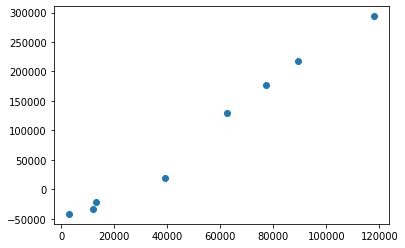

In [45]:
plt.scatter(x=hex_agg.T_Viv_10_20_sum,
           y=hex_agg.T_Pob_10_20_sum)

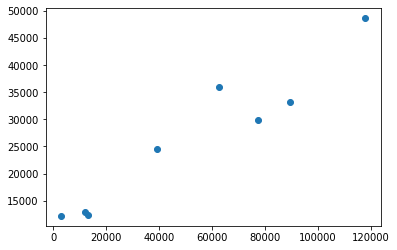

In [46]:
plt.scatter(x=hex_agg.T_Viv_10_20_sum,
           y=hex_agg.vivpar_des_sum)

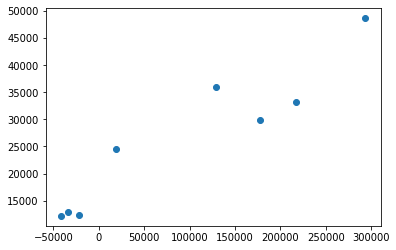

In [47]:
plt.scatter(x=hex_agg.T_Pob_10_20_sum,
           y=hex_agg.vivpar_des_sum)

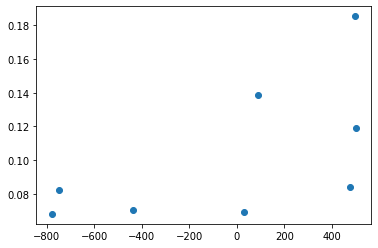

In [48]:
plt.scatter(x=hex_agg.T_Pob_10_20_median,
           y=hex_agg.pct_vivpardes_median)

In [49]:
hex_pdf = gpd.GeoDataFrame()
sample_size = 40

for t in list(hex_merge.time_group.unique()):
    if t == f'{time_analysis[-1]}_min':
        continue
    else:
        hex_tmp = hex_merge.loc[hex_merge.time_group==t].sample(sample_size).copy()
        hex_pdf = pd.concat([hex_pdf, hex_tmp], ignore_index = True, axis = 0)

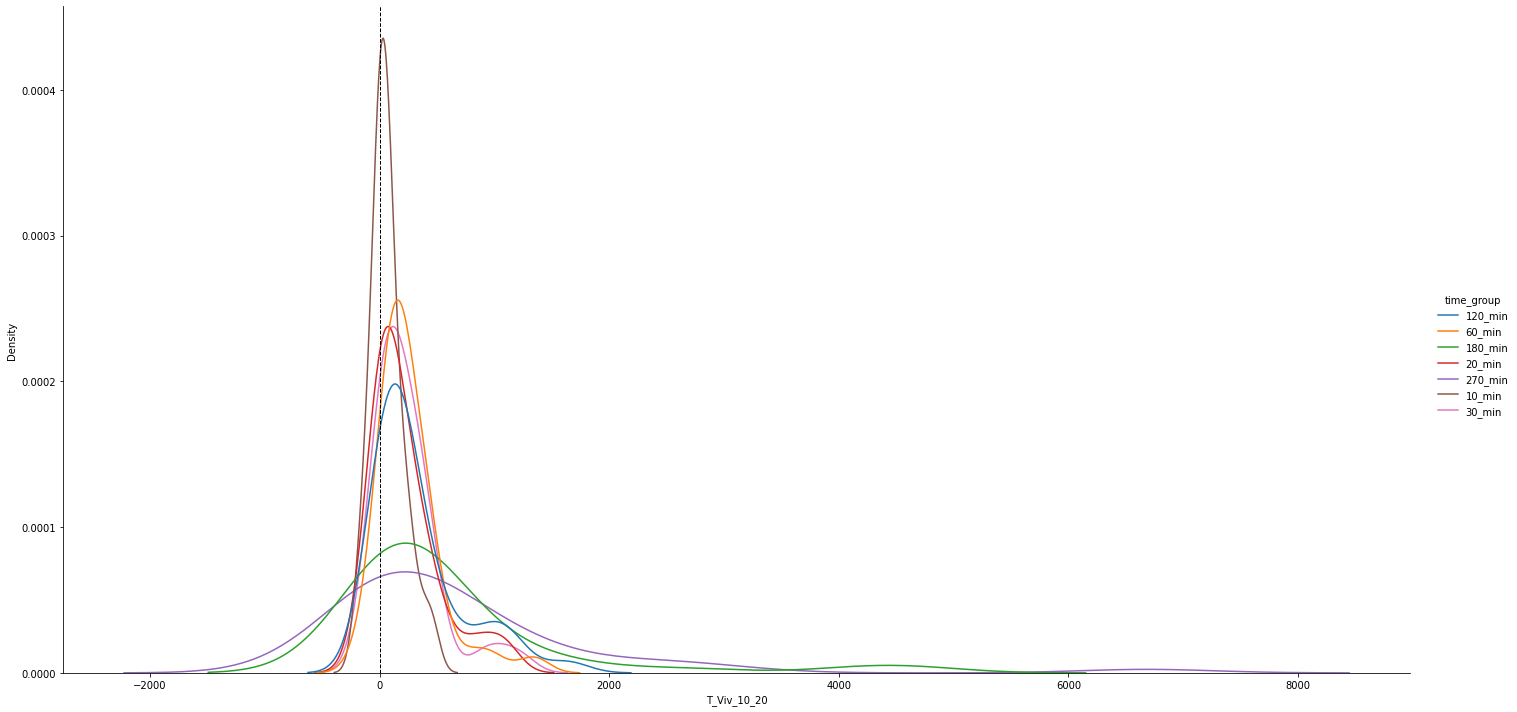

In [50]:
g = sns.displot(data=hex_pdf, x="T_Viv_10_20", hue="time_group", kind="kde",
           height=10, aspect=2)
g.refline(x = 0,
          color = "black",
         lw = 1)

In [51]:
from pandas.api.types import CategoricalDtype

In [52]:
hex_boxplot = hex_pdf.copy()
#categorical data
cat_list = [f'{t}_min' for t in time_analysis]

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_boxplot['time_group'] = hex_boxplot['time_group'].astype(cat_size_order)
hex_boxplot = hex_boxplot.sort_values('time_group')

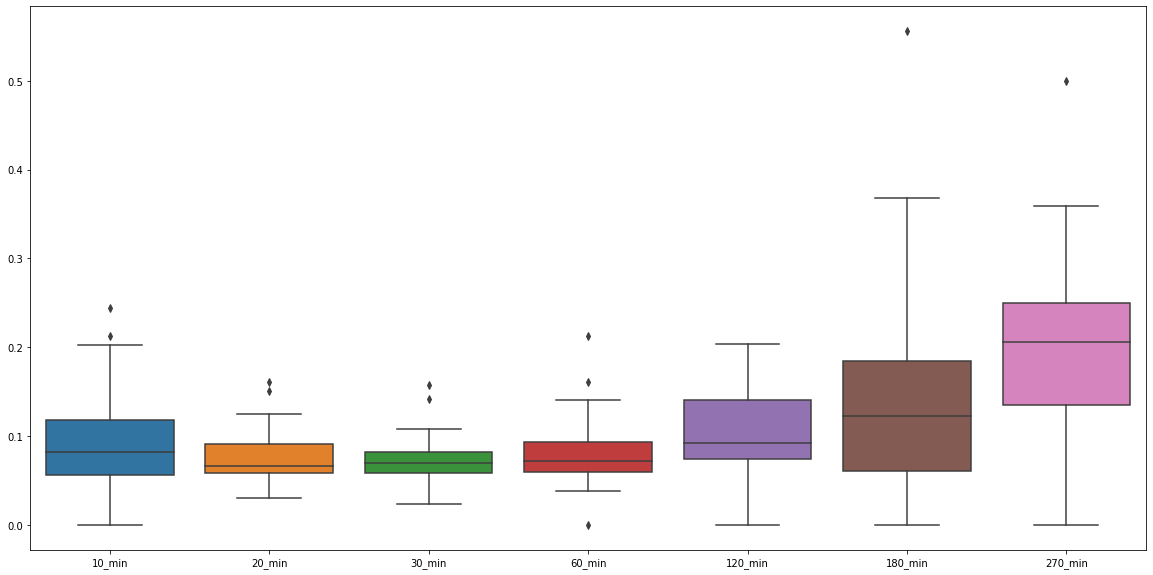

In [53]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.boxplot(x=np.array(hex_boxplot.time_group) , y=np.array(hex_boxplot.pct_vivpardes), ax=ax)


## 15 minute analysis

In [54]:
method = 'MeanTime'
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/15_min_city/'
hex_mean_res8 = gpd.read_file(grl_dir+f'HexRes{res}_{city}_15minAnalisis_v{method}.geojson', driver='GeoJSON')
print(hex_mean_res8.shape)
hex_mean_res8.head(2)

(1160, 63)


,hex_id_8,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Farmacias,Hogar,Complementarios,Comercio,Social,Actividad física,Cultural,Entretenimiento,15_min_analysis,geometry
0,88498c96adfffff,0.0,50.233512,36.412831,5.376246,5.901375,6.526730,12.121979,17.275062,8.685757,...,2.125799,4.128826,4.520398,5.043500,2.444108,26.183558,11.437335,6.601907,6.601907,"POLYGON ((-103.34833 20.67931, -103.34379 20.6..."
1,88498c945bfffff,0.0,47.265461,48.903324,2.466359,7.097363,4.598005,9.126359,20.391876,5.848689,...,2.900897,4.030993,3.294749,5.892762,1.733771,27.717315,6.078341,7.008458,7.008458,"POLYGON ((-103.34272 20.67198, -103.33818 20.6..."


In [55]:
tiempo_limite = 15

In [56]:
hex_mean_res8 = hex_mean_res8[['hex_id_8','15_min_analysis']]

In [57]:
hex_analysis = hex_merge.merge(hex_mean_res8, on='hex_id_8')

In [58]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum()

-107602.0

In [59]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.12338222605694564

In [60]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.12338222605694564

In [61]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

18609.0

In [62]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

418669.0

In [63]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

1353765.7547468098

In [64]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * 0.95 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

1286077.4670094692

In [65]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

1228369.0

In [66]:
100 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() / hex_analysis.pobtot.sum()

23.997661126265776

In [67]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() 

125396.75474680983

In [68]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum()

36002.0

In [69]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum()

52960.0

In [70]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

418669.0

In [71]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

1228369.0

In [72]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.873503889707621

In [73]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

3.2334989090350845

In [74]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.08599155896424145

In [75]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].R_VivDes_20.mean()

0.09042986659008687

In [76]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

-5.782255897683917

In [77]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum()

847078.0

In [78]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

395833.0

In [79]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum()

173716.0

In [80]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

1313797.0

In [81]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.13222438474132608

In [82]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.8135031515523327

In [83]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].R_VivDes_20.mean()

0.1315606708779245

In [84]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

2.1399883284112238

In [85]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.301289316386017

In [86]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.04444800068789426

<AxesSubplot:>

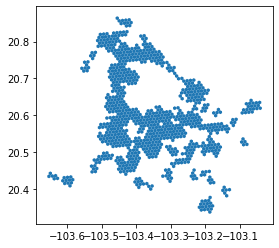

In [87]:
hex_analysis.loc[hex_analysis['15_min_analysis']>20].plot()

In [89]:
gdf['10_prom_ocup'].sum()

0.0

In [90]:
hex_analysis.columns.to_list()

['hex_id_8',
 '10_vivtot',
 'T_Pob_10_20',
 'vivpar_des',
 'pobtot',
 '10_prom_ocup',
 'prom_ocup',
 '10_pobtot',
 'tvivparhab',
 'vivtot',
 'T_Viv_10_20',
 'R_VivDes_20',
 'geometry',
 'pct_vivpardes',
 'time_paradas_transporte',
 'time_group',
 '15_min_analysis']

<AxesSubplot:>

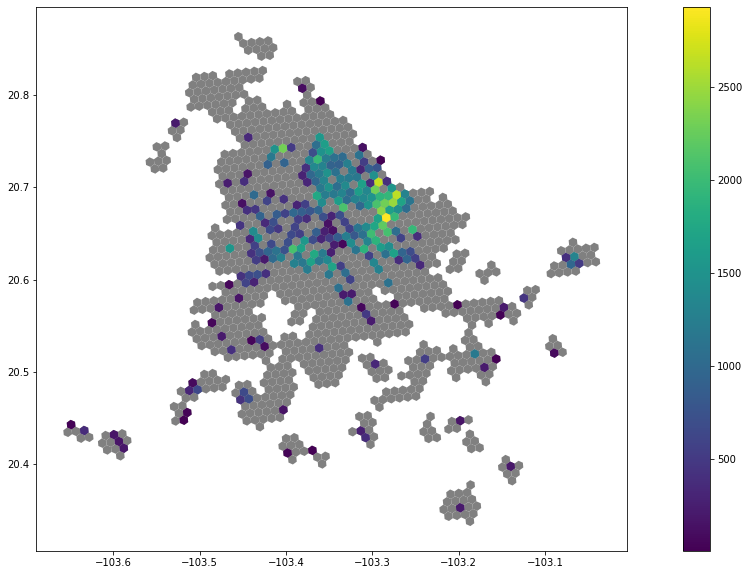

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (2.5 * hex_analysis.T_Viv_10_20)

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot('loss_relation', legend=True, ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

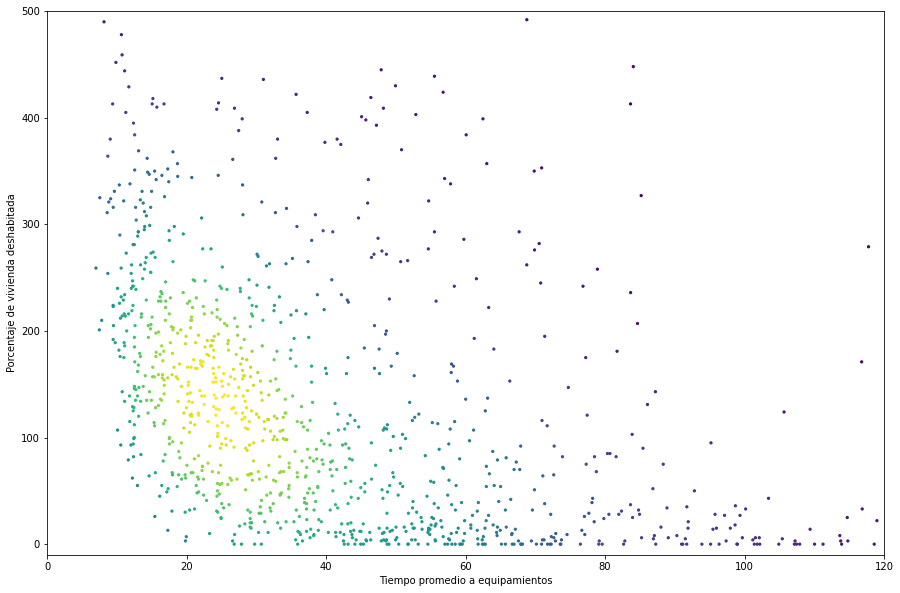

In [92]:
fig, ax = plt.subplots(figsize=(15,10))

idx = hex_analysis.pct_vivpardes.isnull()
hex_scatter = hex_analysis[~idx].copy()

x = np.array(hex_scatter['15_min_analysis'])
y = np.array(hex_scatter['vivpar_des'])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Tiempo promedio a equipamientos')
plt.ylabel('Porcentaje de vivienda deshabitada')

ax.set_xlim(0,120)
ax.set_ylim(-10,500)

plt.show()

In [93]:
# x = np.array(hex_corr.imn_2020).reshape((1,-1))
# y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[ 1.        , -0.01845768],
       [-0.01845768,  1.        ]])

## Elementos de salida

In [94]:
hex_analysis['10_pobtot'].sum()

4379227.0

In [95]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : 3.49,
    'prom_ocup_20' : round(hex_analysis['prom_ocup'].mean(),2),
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    'cambio_pobtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    'cambio_pobtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    'perdida_oportunidad_zona_consolidada' : round((hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() * -1) + 
    (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() * 
     (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()) 
     * round(hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() ,2))),
}

In [96]:
datos_estadisticos

{'viv_tot_2010': 1318024.0,
 'viv_tot_2020': 1732466.0,
 'cambio_vivtot_10_20': 414442.0,
 '%_viv_nueva_10_20': 31.44,
 'pob_tot_2010': 4379227.0,
 'pob_tot_2020': 5118703.0,
 'cambio_pobtot_10_20': 739476.0,
 '%_pob_nueva_10_20': 16.89,
 'pob_nueva-viv_nueva': 1.78,
 'prom_ocup_10': 3.49,
 'prom_ocup_20': 3.44,
 'viv20_sin_viv10': 131111.0,
 '%viv20_sinviv10_cambio_vivtot_10_20': 31.64,
 'pob20_sin_viv10': 287678.0,
 '%pob20_sinviv10_cambio_pobtot_10_20': 38.9,
 'cambio_pobtot_10_20_zona_consolidada': -107602.0,
 'cambio_vivtot_10_20_zona_consolidada': 18609.0,
 'cambio_pobtot_10_20_zona_no_consolidada': 847078.0,
 'cambio_vivtot_10_20_zona_no_consolidada': 395833.0,
 'perdida_oportunidad_zona_consolidada': 160106}

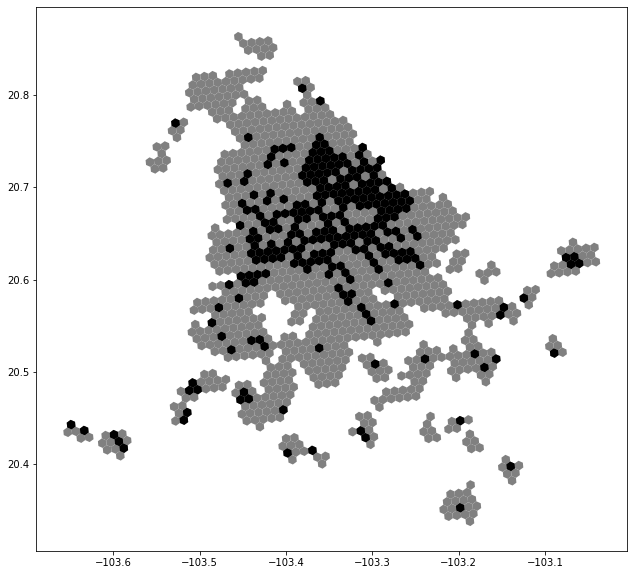

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (round(hex_analysis['prom_ocup'].mean(),2) * (hex_analysis.T_Viv_10_20*(hex_analysis.tvivparhab/hex_analysis.vivtot)))

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot(color='black', ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_PerdidaOportunidad.svg')

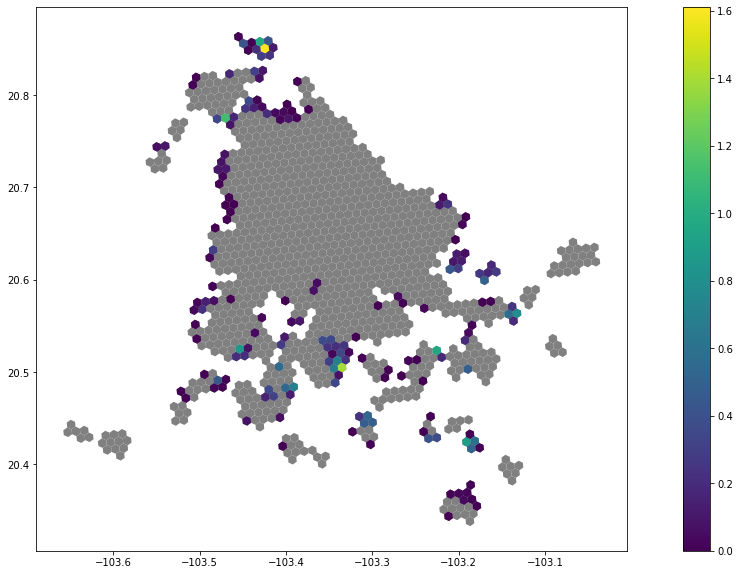

In [98]:
fig, ax = plt.subplots(figsize=(20,10))

hex_analysis.loc[hex_analysis['10_vivtot']==0,'pct_viv_nueva'] = round(100*(hex_analysis['T_Viv_10_20'] / hex_analysis['T_Viv_10_20'].sum()),2)

hex_analysis[hex_analysis['10_vivtot']==0].plot('pct_viv_nueva', legend=True, ax=ax) #### COMPARTIR

gdf.plot(ax=ax, color='grey', zorder=-1)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_VivNueva_sinViv2010.svg')

## Zona 20 minutos AGEB

In [99]:
df = pd.read_json("../../scripts/Metropolis_CVE.json")
c = city

In [100]:
year = 2010

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(1774, 206)


,codigo,cve_geo,geog,fecha_act,geom,institut,OID,geometry,censo,cve_ent,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,LA_6052,1400200010079,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20137,"POLYGON ((-103.59407 20.41429, -103.59652 20.4...",2010,14,...,0.0,183.0,199.0,195.0,167.0,142.0,83.0,95.0,178.0,50.0
1,LA_6052,1400200010030,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20138,"POLYGON ((-103.60162 20.41737, -103.60219 20.4...",2010,14,...,NaN,775.0,878.0,855.0,751.0,431.0,307.0,437.0,683.0,195.0


In [101]:
prom_ocup_tot_10 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_10

3.9833765501691096

In [102]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [103]:
pobtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_10

1323324

In [104]:
prom_ocup_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_10

3.7083879093198995

In [105]:
vivpar_des_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_10

39374.0

In [106]:
vivtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_10

396678

In [107]:
tvivparhab_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_10

347764.0

In [108]:
tvivpar_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_10

389621.0

<AxesSubplot:>

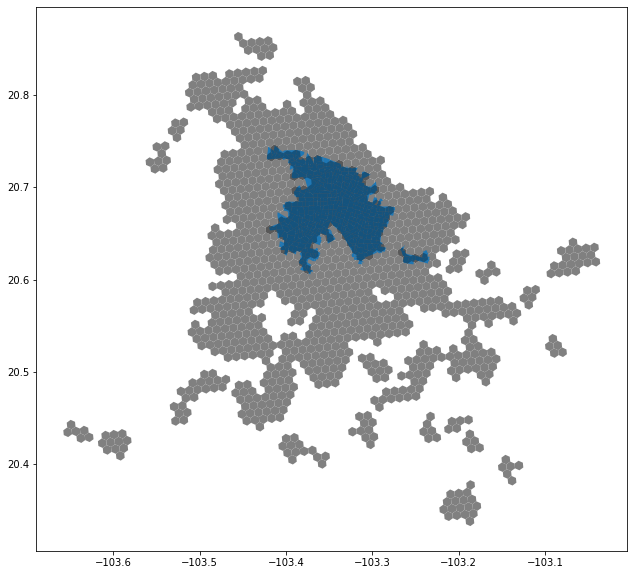

In [109]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

In [110]:
year = 2020

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(2067, 237)


,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,geometry,entidad,nom_ent,mun,nom_mun,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
0,1400200020219,14,002,0002,0219,"POLYGON ((-103.64532 20.44104, -103.64537 20.4...",14,Jalisco,2,Acatlán de Juárez,...,5.0,3.0,4.0,0.0,0.0,0.0,0.0,NaN,0.0,1400200020219
1,1400200020045,14,002,0002,0045,"POLYGON ((-103.63702 20.43797, -103.63715 20.4...",14,Jalisco,2,Acatlán de Juárez,...,1086.0,691.0,1064.0,175.0,94.0,9.0,47.0,431.0,3.0,1400200020045


In [111]:
prom_ocup_tot_20 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_20

3.5170171990171997

In [112]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [113]:
pobtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_20

1215642

In [114]:
prom_ocup_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_20

3.2511838790931993

In [115]:
vivpar_des_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_20

41442.0

In [116]:
vivtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_20

414406

In [117]:
tvivparhab_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_20

362517.0

In [118]:
tvivpar_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_20

397757.0

<AxesSubplot:>

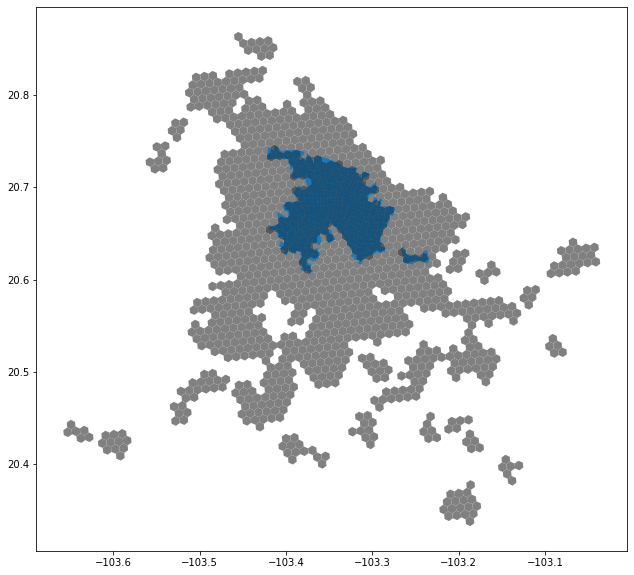

In [146]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

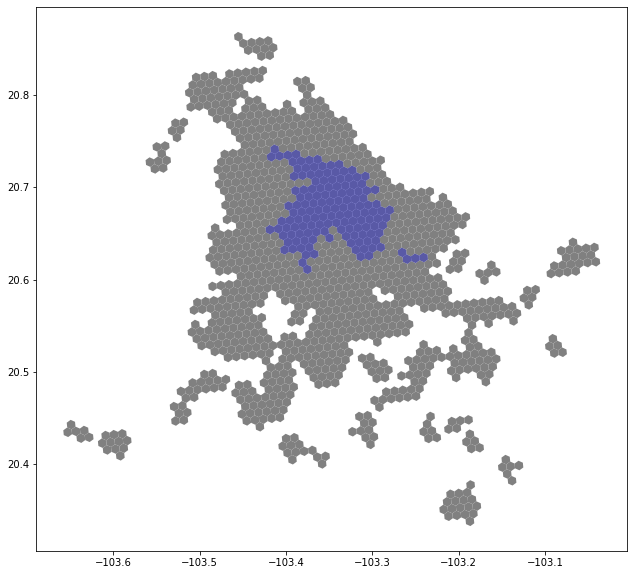

In [153]:
fig, ax = plt.subplots(figsize=(20,10))


hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].dissolve().plot(zorder=2, alpha=0.3, color='blue',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_Poligono_{tiempo_limite}min.svg')

In [120]:
vivtot_20 - vivtot_10 # vivienda total

17728

In [121]:
vivpar_des_20 / vivtot_20

0.10000337832946435

In [122]:
vivpar_des_20 - vivpar_des_10 # vivienda deshabitada

2068.0

In [123]:
(vivpar_des_20 - vivpar_des_10)/vivpar_des_10 # vivienda deshabitada

0.052521968811906336

In [124]:
tvivparhab_20 - tvivparhab_10 # viviendas particulares habitadas

14753.0

In [125]:
tvivpar_20 - tvivpar_10 # total de viviendas particulares

8136.0

In [126]:
vivpar_des_20 / tvivpar_20 # vivpar_des / tvivpar 2020

0.10418924116985999

In [127]:
vivpar_des_20 / vivtot_20 # vivpar_des / vivtot 2020

0.10000337832946435

In [128]:
tvivparhab_20 / tvivpar_20 # tvivparhab / tvivpar 2020

0.9114031934070299

In [129]:
vivpar_des_10 / tvivpar_10 # vivpar_des / tvivpar 2010

0.10105718120943173

In [130]:
vivpar_des_10 / vivtot_10 # vivpar_des / vivtot 2010

0.09925934889255265

In [131]:
tvivparhab_10 / tvivpar_10 # tvivparhab / tvivpar 2010

0.8925699590114496

In [132]:
(vivtot_20 - vivtot_10)/vivtot_10 # vivienda total

0.04469116008450179

In [133]:
prom_ocup_20 - prom_ocup_10 # promedio de ocupantes 2010 vs 2020

-0.4572040302267002

In [134]:
tvivparhab_10 * -0.4882450076804914

-169794.0368509984

In [135]:
pobtot_20 - pobtot_10 # poblacion total

-107682

In [136]:
-287628.5517396312 + 141513

-146115.55173963122

In [137]:
(-287628.5517396312+141513) / (tvivparhab_20 - tvivparhab_10)

-9.904124702747321

In [138]:
prom_ocup_20 * vivpar_des_20

134735.56231738036

In [147]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : prom_ocup_tot_10,
    'prom_ocup_20' : prom_ocup_tot_20,
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    f'cambio_pobtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    f'prom_ocup_20_zona_{tiempo_limite}_min' : prom_ocup_20,
    f'prom_ocup_20_zona_>{tiempo_limite}_min' : prom_ocup_10,
    f'vivienda_deshab_zona_{tiempo_limite}_min' : vivpar_des_20,
    f'vivienda_deshab_zona_>{tiempo_limite}_min' : vivpar_des_10,
    f'cambio_pobtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    f'ocupacion_total_zona_{tiempo_limite}_min' : prom_ocup_20 * vivpar_des_20,
}

In [148]:
df_est = pd.DataFrame.from_dict(datos_estadisticos, orient='index').reset_index().rename(columns={'index':'Variables',
                                                                                        0:'Valores'})

grl_dir = '/workspaces/accesibilidad-urbana/output/data/viv_change/'
df_est.to_csv(grl_dir + f'{city}_Estadisticos_Cambio_Vivienda.csv')